<a href="https://colab.research.google.com/github/AMO-35/DIP_Re_evaluation_Task/blob/main/DIP_Re_evaluation_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task of DIP Lab Final 2024(SEC 2019-20):


1. Upload the image(DIP_Lab_task_01.png) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2. Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3. Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4. Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively. [20]
5. Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg' [30]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task 1**

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

first_image = cv2.imread('/content/drive/MyDrive/Images/DIP_Lab_task_01.png')

#i. image dimensions for the first image
print(f"Image Dimensions: {first_image.shape}")


Image Dimensions: (225, 225, 3)


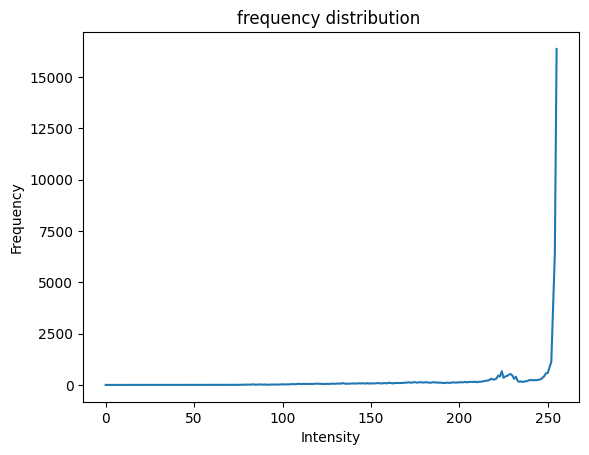

In [5]:
# ii.  Frequency distribution of intensities
histogram_plot = cv2.calcHist([first_image], [0], None, [256], [0, 256])
plt.plot(histogram_plot)
plt.title('frequency distribution ')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

In [6]:
#range
pixel_range = first_image.max() - first_image.min() + 1
print(f"Range of Pixel Intensity: {pixel_range}")

Range of Pixel Intensity: 251


# **Task 2**

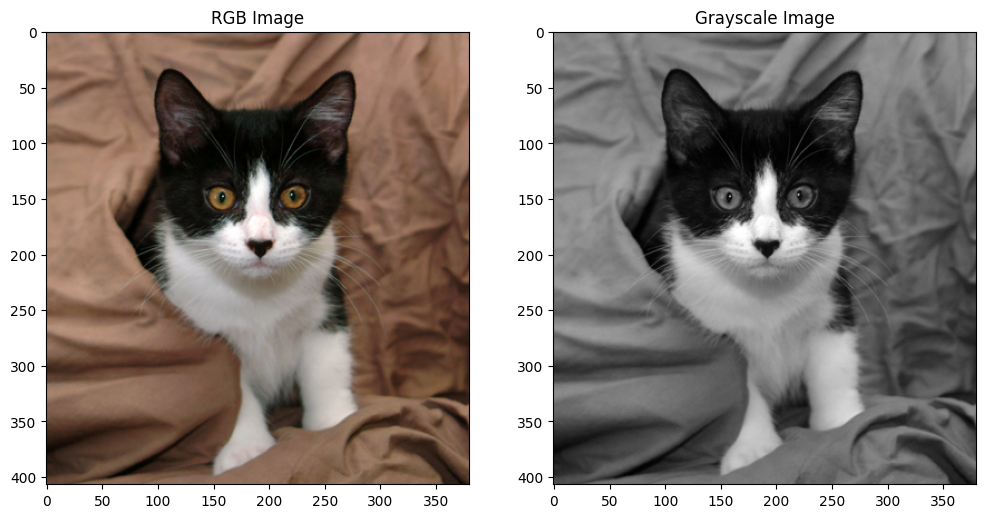

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Second_image_path = "/content/drive/MyDrive/Images/DIP_Lab_task_02.jpg"
Second_image = Image.open(Second_image_path)

rgb_array = np.array(Second_image)
gray_array = 0.2989 * rgb_array[:, :, 0] + 0.5870 * rgb_array[:, :, 1] + 0.1140 * rgb_array[:, :, 2] #formula: Gray = 0.2989*R + 0.5870*G + 0.1140*B

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#RGB
axes[0].imshow(Second_image)
axes[0].set_title("RGB Image")

#GrayScale
axes[1].imshow(gray_array, cmap='gray')
axes[1].set_title("Grayscale Image")


plt.show()

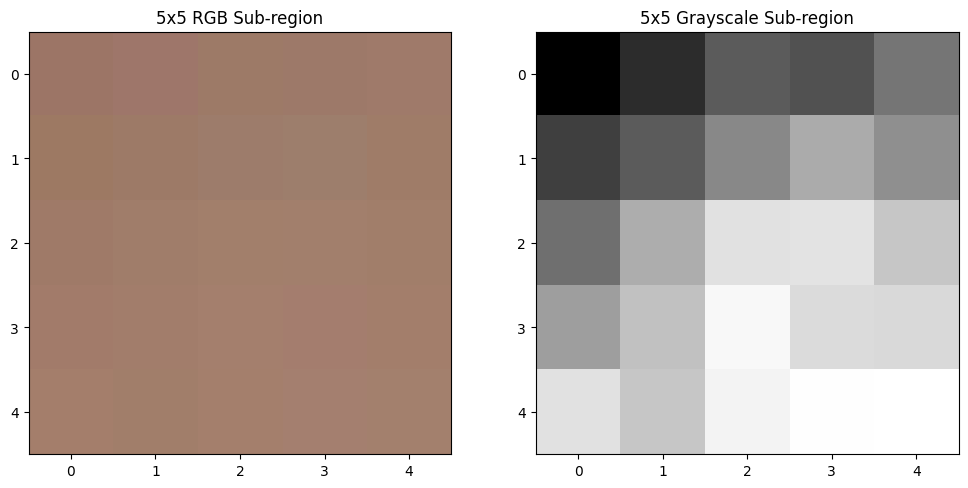

In [11]:
sub_region_rgb = rgb_array[0:5, 0:5]
sub_region_gray = gray_array[0:5, 0:5]

fig_sub, axes_sub = plt.subplots(1, 2, figsize=(12, 6))

#  5x5 sub-region  RGB image
axes_sub[0].imshow(sub_region_rgb / 255)
axes_sub[0].set_title("5x5 RGB Sub-region")

#  5x5 sub-region grayscale image
axes_sub[1].imshow(sub_region_gray, cmap='gray')
axes_sub[1].set_title("5x5 Grayscale Sub-region")

plt.show()

In [12]:
print("5x5 RGB Sub-region (R, G, B values):")
print(sub_region_rgb)

print("\n5x5 Grayscale Sub-region (Intensity values):")
print(sub_region_gray)

5x5 RGB Sub-region (R, G, B values):
[[[156 117 102]
  [158 118 106]
  [157 122 103]
  [157 121 105]
  [159 122 106]]

 [[157 121  99]
  [157 122 103]
  [157 124 107]
  [157 126 108]
  [159 124 104]]

 [[159 122 104]
  [160 125 106]
  [162 127 107]
  [162 127 108]
  [161 126 106]]

 [[162 123 106]
  [162 125 107]
  [164 127 109]
  [164 125 110]
  [163 126 107]]

 [[164 126 107]
  [161 126 106]
  [164 127 108]
  [164 127 111]
  [163 128 109]]]

5x5 Grayscale Sub-region (Intensity values):
[[126.9354 128.5762 130.2833 129.9243 131.2231]
 [129.2403 130.2833 131.9133 133.2013 132.1691]
 [130.9951 133.283  135.1688 135.2828 134.1689]
 [132.7068 133.9948 135.9946 134.9346 134.8807]
 [135.1796 134.1689 135.8806 136.2226 136.2827]]


# **Task 3**

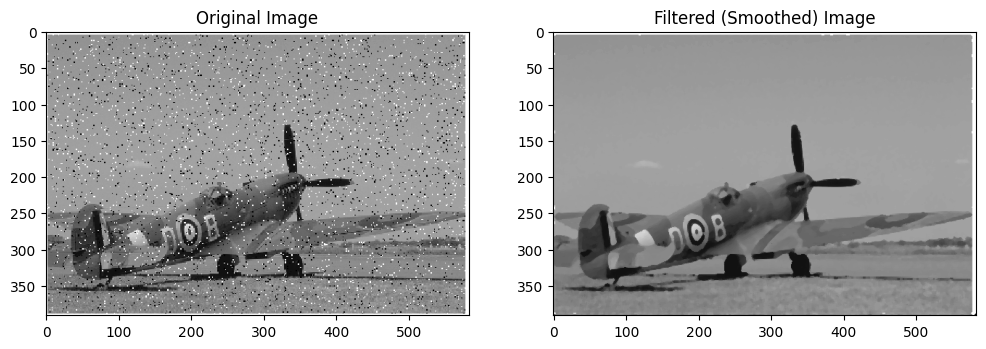

In [13]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np


Third_Image = io.imread('/content/drive/MyDrive/Images/DIP_Lab_task_03.png')


if len(Third_Image.shape) > 2:
    grayscale_image = color.rgb2gray(Third_Image)


grayscale_image = (grayscale_image * 255).astype(np.uint8)


def apply_filter(img_data, filter_kernel):
    img_height, img_width = np.shape(img_data)
    kernel_height, kernel_width = np.shape(filter_kernel)


    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    # Padding
    padded_image_data = np.pad(img_data, ((padding_height, padding_height), (padding_width, padding_width)), 'constant')


    output_image_data = np.zeros((img_height, img_width), dtype=np.uint8)

    # Applying the kernel to each region of interest
    for row in range(img_height):
        for col in range(img_width):
            roi = padded_image_data[row:row+kernel_height, col:col+kernel_width]
            output_image_data[row, col] = np.median(roi)

    return output_image_data

# for smoothing
average_kernel = np.ones((5, 5)) / 9  #averaging kernel

# using median filtering
filtered_image = apply_filter(grayscale_image, average_kernel)

#original and smoothed images
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered (Smoothed) Image')

plt.show()

# **Task 4**

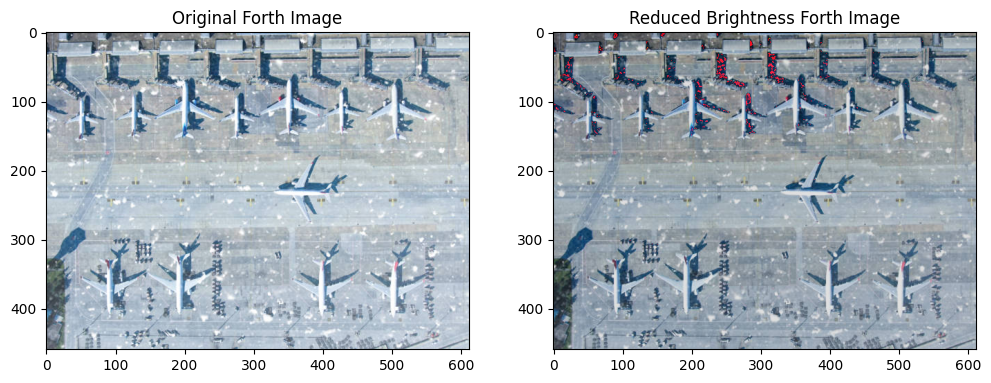

In [14]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


forth_image = io.imread('/content/drive/MyDrive/Images/DIP_Lab_task_04.jpg')


if len(forth_image.shape) > 2:
    forth_image_rgb = forth_image
else:
    forth_image_rgb = np.stack([forth_image] * 3, axis=-1)

#constant
brightness_reduction_value = 30

# Subtract
reduced_brightness_forth_image = forth_image_rgb - brightness_reduction_value

# range (0-255)
reduced_brightness_forth_image = np.clip(reduced_brightness_forth_image, 0, 255).astype(np.uint8)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(forth_image_rgb)
plt.title('Original Forth Image')


plt.subplot(1, 2, 2)
plt.imshow(reduced_brightness_forth_image)
plt.title('Reduced Brightness Forth Image')

plt.show()
